<ipython-input-11-2999557269>:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a0 = (1 / (2 * L)) * np.trapz([f(x) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)
<ipython-input-11-2999557269>:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  an_n = (1 / L) * np.trapz(f(x_vals) * cos_vals, x_vals)
<ipython-input-11-2999557269>:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bn_n = (1 / L) * np.trapz(f(x_vals) * sin_vals, x_vals)


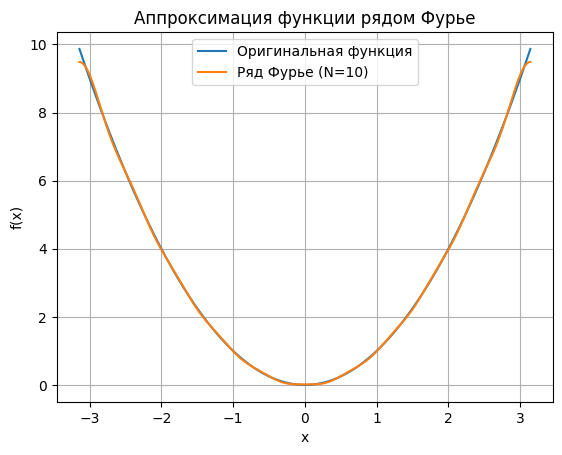

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Задаём функцию для аппроксимации
def f(x):
    return x**2  # например, функция x^2

# Параметры
N = 10  # число гармоник в ряде Фурье
L = np.pi  # период функции (интервал [-L, L])

# Коэффициенты a0, an, bn
def compute_fourier_coefficients(f, N, L):
    a0 = (1 / (2 * L)) * np.trapz([f(x) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)

    an = []
    bn = []
    x_vals = np.linspace(-L, L, 1000)
    dx = x_vals[1] - x_vals[0]

    for n in range(1, N+1):
        cos_vals = np.cos(n * np.pi * x_vals / L)
        sin_vals = np.sin(n * np.pi * x_vals / L)

        an_n = (1 / L) * np.trapz(f(x_vals) * cos_vals, x_vals)
        bn_n = (1 / L) * np.trapz(f(x_vals) * sin_vals, x_vals)

        an.append(an_n)
        bn.append(bn_n)

    return a0, an, bn

# Функция ряда Фурье
def fourier_series(x, a0, an, bn, L):
    result = a0
    for n in range(1, len(an)+1):
        result += an[n-1] * np.cos(n * np.pi * x / L) + bn[n-1] * np.sin(n * np.pi * x / L)
    return result

# Вычисляем коэффициенты
a0, an, bn = compute_fourier_coefficients(f, N, L)

# Строим графики
x_plot = np.linspace(-L, L, 1000)
f_original = f(x_plot)
f_approx = fourier_series(x_plot, a0, an, bn, L)

plt.plot(x_plot, f_original, label='Оригинальная функция')
plt.plot(x_plot, f_approx, label=f'Ряд Фурье (N={N})')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Аппроксимация функции рядом Фурье')
plt.grid(True)
plt.show()
